This notebook looks into subhalo tracking for all simulations.

- Look into subhalo selection based on scale radii with the main halo and the merging satellite.

In [6]:
import numpy as np
#import pandas as pd
import pickle


from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
# %matplotlib widget

import sys
sys.path.append("/mnt/home/ecunningham/python")#import compute_characteristics_ut as cc
import gizmo_analysis as ga
import utilities as ut
import halo_analysis as halo
#import agama
#import deepdish as dd

In [7]:
sim_dir = f'/mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/'
nsnap = 350
#folder = 'm12b_{}/'.format(nsnap)
halt = halo.io.IO.read_tree(simulation_directory=sim_dir,)
hal = halo.io.IO.read_catalogs(snapshot_value_kind= 'index', snapshot_values=600, simulation_directory=sim_dir,)
# part = cc.read(sim_dir, nsnap, assign_hosts_rotation=True)


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

* read 19882039 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/tree.hdf5


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 600, redshift = 0.000

* read 39597 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/halo_600.hdf5

# in halo_analysis.halo_io.Particle():
* read 39597 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/star_600.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished



In [8]:
def get_catids_satsubhalos(sim_dir, sim):
    
    halt = halo.io.IO.read_tree(simulation_directory=sim_dir)
    
    if sim =='m12b':
        smax = 300
        # 0 is host
        sat_index_peak_mass = 1
        nsnaps = 600-smax
        
  
    elif sim == 'm12c':
        smax = 300
        # 0 is host
        sat_index_peak_mass = 1
        nsnaps = 600-smax
        
  
    elif sim == 'm12f':
        smax = 300
        # 0 is host
        sat_index_peak_mass = 1
        nsnaps = 600-smax
        
  
    elif sim == 'm12i':
        # 0 is host
        sat_index_peak_mass = 1
        nsnaps = 600-smax
        smax = 300
    elif sim == 'm12m':
        # 0 is host
        sat_index_peak_mass = 1
        nsnaps = 600-smax
        
        smax = 300
    elif sim == 'm12r':
        smax = 300
        # 0 is host
        sat_index_peak_mass = 1
        nsnaps = 600-smax
        
  
    elif sim == 'm12w':
        smax = 300 # get this authomatically? 
        # 0 is host
        sat_index_peak_mass = 1
        nsnaps = 600-smax
        
    snap_peak_mass = np.where(halt['snapshot'] == smax)[0]
    sat_id_peak_mass = np.argsort(halt['mass'][snap_peak_mass])[sat_index_peak_mass]
    print(sat_id_peak_mass)
    subhalos_sat = np.where(halt['central.local.index'][snap_peak_mass]==sat_id_peak_mass)[0]

    
    nsub_sat = len(subhalos_sat)
    print('Number of maximum satellite subhalos identify by halo finder {} at snapshot {}'.format(nsub_sat, smax))
    
    sat_indices = np.zeros((nsnaps))
    sat_indices = hindices[subhalos_sat]

    cat_idx = np.zeros((300, nsub_sat))
    cat_idx[0] = halt['catalog.index'][sat_indices]
    
    for k in range(0, nsnaps):
        sat_indices = halt['descendant.index'][sat_indices]
        #print(len(sat_indices))
        cat_idx[k+1] = halt['catalog.index'][sat_indices]
    return cat_idx

#### 

In [9]:
m12b_satsubhalos_cat_ids = get_catids_satsubhalos(sim_dir, 'm12b')


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

* read 19882039 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/halo/rockstar_dm/catalog_hdf5/tree.hdf5

242
Number of maximum satellite subhalos identify by halo finder 0 at snapshot 300


NameError: name 'hindices' is not defined

In [33]:
# Halos ideneitfy at snap 300 and their masses
hindices = np.where(halt['snapshot'] == 300)[0]
print(halt['mass'][hindices])

[5.9350431e+11 5.6289175e+06 2.7441595e+06 ... 8.4434475e+05 1.3720655e+06
 1.2313390e+06]


(array([5.934e+03, 2.441e+04, 8.594e+03, 2.913e+03, 8.160e+02, 2.240e+02,
        5.300e+01, 2.100e+01, 3.000e+00, 2.000e+00]),
 array([ 5.3446555,  5.9875326,  6.6304092,  7.273286 ,  7.916163 ,
         8.55904  ,  9.201917 ,  9.844793 , 10.487671 , 11.130548 ,
        11.773424 ], dtype=float32),
 <BarContainer object of 10 artists>)

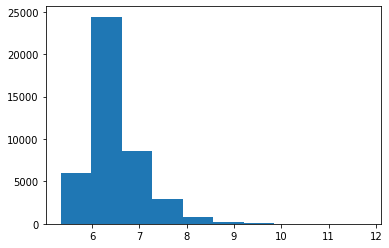

In [36]:
plt.hist(np.log10(halt['mass'][hindices]))

In [11]:
np.argsort(halt['mass'][hindices])[::-1]

array([    0,  6092,  8502, ...,  8269,   242, 42458])

In [12]:
np.sort(halt['mass'][hindices])[::-1]

array([5.9350431e+11, 2.0535612e+11, 4.1552708e+10, ..., 2.4626781e+05,
       2.4626495e+05, 2.2113391e+05], dtype=float32)

In [13]:
hindices[0]

1103014

In [14]:
hindices[6092]

1109106

In [46]:
hindices[8502]

3176773

In [114]:
cindex = np.where(halt['central.index'][hindices] == 1103014)[0]

In [115]:
len(cindex)

4028

In [43]:
subhalos_host = np.where(halt['central.local.index'][hindices]==1103014)[0]

In [47]:
subhalos_sat = np.where(halt['central.local.index'][hindices]==1109106)[0]
subhalos_sat2 = np.where(halt['central.local.index'][hindices]==3176773)[0]

In [48]:
print(len(hindices), len(subhalos_host), len(subhalos_sat), len(subhalos_sat2))

42970 3734 1071 13


In [61]:
halt['radius'][hindices]

array([143.03064  ,   2.5409186,   2.1877584, ...,   1.6113889,
         1.8453002,   1.7359886], dtype=float32)

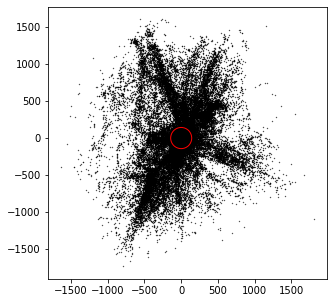

In [64]:
fig, ax = plt.subplots(figsize=(5, 5)) # note we must use plt.subplots, not plt.subplot
plt.scatter(halt['host.distance'][hindices][:,0], halt['host.distance'][hindices][:,1], c='k', s=0.1)
circle1 = plt.Circle((0, 0), 143, color='r', fill=False)

ax.add_patch(circle1)

In [66]:
dsubh = np.sqrt(np.sum(halt['host.distance'][hindices]**2, axis=1))

In [75]:
rcut = np.where(dsubh<143)

In [76]:
len(rcut[0])

4026

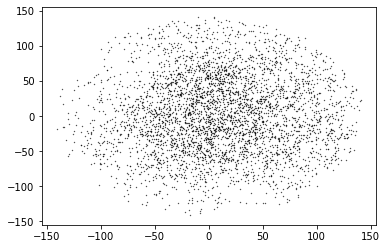

In [70]:
# Subhalos witin host.radius 
plt.scatter(halt['host.distance'][hindices][rcut][:,0], halt['host.distance'][hindices][rcut][:,1], c='k', s=0.1)


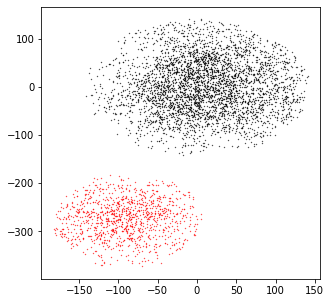

In [107]:
fig, ax = plt.subplots(figsize=(5, 5)) # note we must use plt.subplots, not plt.subplot

plt.scatter(halt['host.distance'][hindices][subhalos_host][:,0], halt['host.distance'][hindices][subhalos_host][:,1], c='k', s=0.1)
plt.scatter(halt['host.distance'][hindices][subhalos_sat][:,0], halt['host.distance'][hindices][subhalos_sat][:,1], c='r', s=0.1)


In [84]:
len(subhalos_sat)

1071

In [118]:
nsub_sat = len(subhalos_sat)
sat_indices = hindices[subhalos_sat]
pos_sat = np.zeros((300, nsub_sat, 3))
pos_sat[0] = halt['host.distance'][sat_indices]

cat_idx = np.zeros((300, nsub_sat))
cat_idx[0] = halt['catalog.index'][sat_indices]

In [119]:
for k in range(0, 299):
    sat_indices = halt['descendant.index'][sat_indices]
    #print(len(sat_indices))
    pos_sat[k+1] = halt['host.distance'][sat_indices]
    cat_idx[k+1] = halt['catalog.index'][sat_indices]

In [ ]:
cindex = np.where(halt['central.index'][hindices] == 1103014)[0]

In [ ]:
cindex = np.where(halt['central.index'][hindices] == 1103014)[0]

In [ ]:
nsub_host = len(cindex)
host_indices = hindices[subhalos_sat]
pos_sat_h = np.zeros((300, nsub_host, 3))
pos_sat_h[0] = halt['host.distance'][host_indices]
cat_idx = np.zeros((300, nsub_host))
for k in range(0, 299):
    sat_indices = halt['descendant.index'][sat_indices]
    #print(len(sat_indices))
    pos_sat[k+1] = halt['host.distance'][sat_indices]
    cat_idx[k+1] = halt['catalog.index'][sat_indices]

In [110]:
dist_z0 = np.sqrt(np.sum(pos_sat[-1]**2, axis=1))

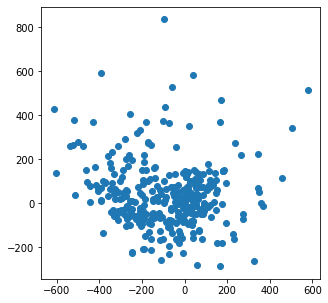

In [111]:
fig, ax = plt.subplots(figsize=(5, 5)) # note we must use plt.subplots, not plt.subplot
plt.scatter(pos_sat[-1, :, 0], pos_sat[-1, :, 1])
plt.

In [116]:
np.

Object `np.pop` not found.


In [79]:
halt.keys()

dict_keys(['am.phantom', 'am.progenitor.main', 'axis.b/a', 'axis.c/a', 'catalog.index', 'central.index', 'central.local.index', 'descendant.index', 'descendant.snapshot', 'dindex', 'final.index', 'host.distance', 'host.index', 'host.velocity', 'host.velocity.rad', 'host.velocity.tan', 'major.merger.snapshot', 'mass', 'mass.180m', 'mass.200c', 'mass.200m', 'mass.500c', 'mass.bound', 'mass.lowres', 'mass.vir', 'position', 'position.offset', 'progenitor.co.dindex', 'progenitor.co.index', 'progenitor.last.dindex', 'progenitor.main.index', 'progenitor.main.last.dindex', 'progenitor.number', 'radius', 'scale.radius', 'scale.radius.klypin', 'snapshot', 'spin.bullock', 'spin.peebles', 'tid', 'vel.circ.max', 'vel.std', 'velocity', 'velocity.offset'])

In [106]:
halt['central.index'][1103014]

-19882040

In [102]:
halt['central.local.index'][1109106]

-19882040

In [55]:
halt['host.index'][hindices]

array([1103014, 1103014, 1103014, ..., 1103014, 1103014, 1103014],
      dtype=int32)

In [ ]:
halt.prop('descendant.indices', )


In [31]:
halt['mass'][hindices][6092]

205356120000.0

In [113]:
subhalos = np.where(halt['central.local.index'][hindices] ==  hindices[6092])[0]

In [117]:
subhalos_main = np.where(halt['central.index'][hindices] ==  hindices[0])[0]

In [118]:
print(len(subhalos), len(subhalos_main))

1071 4028


In [34]:
halt['descendant.snapshot'][hindices][6092]

301

In [108]:
halt.prop('descendant.indices', hindices[6092])

array([1109106, 1100627, 1092184, 1083770, 1075398, 1067084, 1058805,
       1050558, 1042359, 1034213, 1026093, 1018010, 1009950, 1001913,
        993923,  985956,  978030,  970123,  962245,  954388,  946591,
        938826,  931092,  923384,  915712,  908061,  900441,  892842,
        885274,  877742,  870235,  862778,  855353,  847957,  840581,
        833251,  825960,  818732,  811529,  804365,  797218,  790108,
        783018,  775957,  768931,  761954,  754996,  748071,  741166,
        734294,  727445,  720629,  713843,  707093,  700366,  693684,
        687031,  680423,  673851,  667305,  660776,  654276,  647812,
        641373,  634961,  628582,  622245,  615941,  609677,  603440,
        597239,  591066,  584915,  578798,  572710,  566651,  560631,
        554633,  548697,  542788,  536915,  531071,  525266,  519501,
        513775,  508097,  502458,  496851,  491292,  485771,  480282,
        474832,  469410,  464017,  458646,  453319,  448025,  442767,
        437521,  432

In [107]:
halt.prop('descendant.indices', hindices[0])

array([1103014, 1094565, 1086143, 1077761, 1069443, 1061158, 1052904,
       1044697, 1036537, 1028415, 1020325, 1012263, 1004227,  996226,
        988258,  980329,  972421,  964538,  956677,  948873,  941102,
        933361,  925653,  917975,  910319,  902694,  895092,  887522,
        879979,  872473,  865004,  857570,  850167,  842783,  835454,
        828159,  820917,  813712,  806544,  799396,  792281,  785180,
        778118,  771088,  764106,  757142,  750218,  743310,  736436,
        729584,  722768,  715975,  709215,  702489,  695793,  689141,
        682527,  675954,  669411,  662879,  656379,  649906,  643460,
        637046,  630661,  624322,  618010,  611738,  605493,  599285,
        593108,  586954,  580837,  574751,  568689,  562671,  556674,
        550738,  544834,  538963,  533120,  527312,  521543,  515816,
        510138,  504500,  498898,  493341,  487824,  482338,  476890,
        471471,  466078,  460712,  455387,  450094,  444837,  439596,
        434367,  429

In [37]:
len(halt.prop('descendant.indices', hindices[6092]))

301

In [ ]:
halt['mass'][hindices][6092]

In [30]:
halt.keys()

dict_keys(['am.phantom', 'am.progenitor.main', 'axis.b/a', 'axis.c/a', 'catalog.index', 'central.index', 'central.local.index', 'descendant.index', 'descendant.snapshot', 'dindex', 'final.index', 'host.distance', 'host.index', 'host.velocity', 'host.velocity.rad', 'host.velocity.tan', 'major.merger.snapshot', 'mass', 'mass.180m', 'mass.200c', 'mass.200m', 'mass.500c', 'mass.bound', 'mass.lowres', 'mass.vir', 'position', 'position.offset', 'progenitor.co.dindex', 'progenitor.co.index', 'progenitor.last.dindex', 'progenitor.main.index', 'progenitor.main.last.dindex', 'progenitor.number', 'radius', 'scale.radius', 'scale.radius.klypin', 'snapshot', 'spin.bullock', 'spin.peebles', 'tid', 'vel.circ.max', 'vel.std', 'velocity', 'velocity.offset'])

In [ ]:
np.argsort(halt['mass'][hindices])[::-1]

In [ ]:
halt['progenitor.number']

In [9]:
## Track main halo and merg sat at nsnap.
##at current snapshot 449	
mh_cat_ind = np.where(hal.prop('host.distance.total') == 0)[0]	
# 508097	33225
merg_sat_tree = 508097
merg_sat_cat = 33225

mh_tree_ind = hal['tree.index'][mh_cat_ind][0]

In [10]:
#Track back to 300th snap and fwd.
prog_index = halt['progenitor.main.index'][merg_sat_tree]
desc_index = halt['descendant.index'][merg_sat_tree]

prog_index_300 = prog_index
start_snap = 300
# start_snap = 200 #Themla
for i in range (start_snap,nsnap-1):
    prog_index_300 = halt['progenitor.main.index'][prog_index_300]
    snap = halt['snapshot'][prog_index_300]

h_index = prog_index_300
tree_ind_merg_sat = []
for _ in range(start_snap,601):
    tree_ind_merg_sat.append(h_index)
    h_index = halt['descendant.index'][h_index]
tree_ind_merg_sat = np.array(tree_ind_merg_sat)

In [13]:
with open(f'{sim_dir}/track/LMC_cat_ind.npy','wb') as f:
    np.save(f,halt['catalog.index'][tree_ind_merg_sat])

In [11]:
#Track back to 300th snap and fwd.
prog_index = halt['progenitor.main.index'][mh_tree_ind]
desc_index = halt['descendant.index'][mh_tree_ind]

prog_index_300 = prog_index
start_snap = 300
# start_snap = 200 #Themla
for i in range (start_snap,nsnap-1):
    prog_index_300 = halt['progenitor.main.index'][prog_index_300]
    snap = halt['snapshot'][prog_index_300]

h_index = prog_index_300
tree_ind_mh = []
for _ in range(start_snap,601):
    tree_ind_mh.append(h_index)
    h_index = halt['descendant.index'][h_index]
tree_ind_mh = np.array(tree_ind_mh)

In [12]:
# %%time
# def return_MH_ind(nsnap):
#     return np.where((halt['snapshot'] == nsnap) & (np.linalg.norm(halt['host.distance'], axis=1) ==0))[0]
# main_halo_ind = np.array([return_MH_ind(snap) for snap in range(300,601)])

# virial_rad = halt['radius'][main_halo_ind]
# plt.plot(np.arange(300,601), virial_rad)

# with open(f'{folder}virial_rad_MH.p', 'wb') as fp:
#     pickle.dump(virial_rad, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [13]:
with open(f'{folder}virial_rad_MH.p', 'rb') as fp:
    virial_rad = pickle.load(fp)

[ -88.51993493 -277.10980222 -155.84950252] 330.02225500834487


(<matplotlib.lines.Line2D at 0x15550651d100>,
 <matplotlib.lines.Line2D at 0x1555064f3820>)

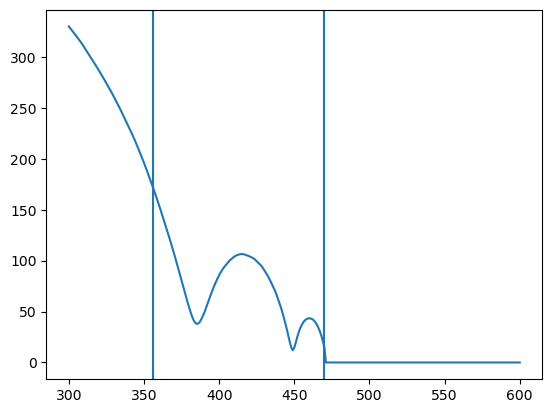

In [14]:
scalefact_all = np.vstack([hal.Snapshot['scalefactor'][start_snap:],hal.Snapshot['scalefactor'][start_snap:],hal.Snapshot['scalefactor'][start_snap:]]).T
merg_sat_pos = scalefact_all*(halt['position'][tree_ind_merg_sat] - halt['position'][tree_ind_mh])
merg_sat_auto = halt['host.distance'][tree_ind_merg_sat]
plt.plot(range(start_snap,601), np.linalg.norm(merg_sat_pos, axis=1))
# plt.plot(range(start_snap,601), np.linalg.norm(merg_sat_auto, axis=1))
print(merg_sat_pos[0], np.linalg.norm(merg_sat_pos[0]))
plt.axvline(356), plt.axvline(470)

THis is the infalling satellite, next we should look into the virial radius of the falling satellite and explore whether 300th snapshot is a good place to start tracking. 

In [15]:
nsnap = start_snap
main_hal_tree_nsnap = np.where((halt['snapshot'] == nsnap) & (np.linalg.norm(halt['host.distance'], axis=1) ==0))[0]

In [16]:
tree_ind_mh[0], main_hal_tree_nsnap[0]

(1103014, 1103014)

In [17]:
nsnap = start_snap
main_hal_tree_nsnap = np.where((halt['snapshot'] == nsnap) & (np.linalg.norm(halt['host.distance'], axis=1) ==0))[0]
rvir_main_halo, rvir_merg_sat = halt['radius'][main_hal_tree_nsnap[0]], halt['radius'][tree_ind_merg_sat[0]] 
print(rvir_main_halo, rvir_merg_sat)

143.03064 99.90228


In [18]:
## Tree indices at 300 for main halo and merging sat
main_hal_tree_nsnap[0], tree_ind_merg_sat[0]

(1103014, 1109106)

In [19]:
ms_cat_ind_300 = halt['catalog.index'][tree_ind_merg_sat[0]] 
ms_cat_ind_300

6686

In [26]:
#Load the 300th snapshot and find potential subhalos
hal = halo.io.IO.read_catalogs(snapshot_value_kind='index', snapshot_values=start_snap, simulation_directory=sim_dir,)
scale_fact = hal.snapshot['scalefactor']
main_halo = np.where(hal.prop('host.distance.total') == 0)[0]
pos_sat_wrt_host = scale_fact*(hal['position'][ms_cat_ind_300]-hal['position'][main_halo])[0]
pos_sat_wrt_host, hal['position'][ms_cat_ind_300], hal['position'][main_halo]


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100//snapshot_times.txt

  using snapshot index = 300, redshift = 0.864

* read 51054 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100//halo/rockstar_dm/catalog_hdf5/halo_300.hdf5

# in halo_analysis.halo_io.Particle():
* read 51054 halos, 96 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100//halo/rockstar_dm/catalog_hdf5/star_300.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished



(array([ -88.519905, -277.1097  , -155.84944 ], dtype=float32),
 array([39998.008, 41445.9  , 40060.414], dtype=float32),
 array([[40162.965, 41962.293, 40350.84 ]], dtype=float32))

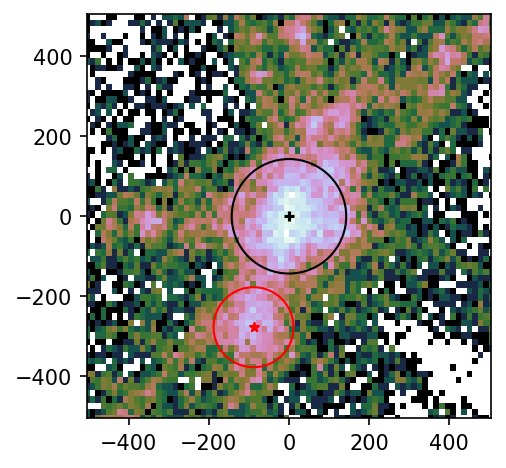

In [27]:
x_axis, y_axis = 0, 1

plt.figure(figsize=(3.5,3.5), dpi=150)
plt.hist2d(hal['host.distance'][:,x_axis],
           hal['host.distance'][:,y_axis],
#           C=feh,
           bins=300,
           norm = LogNorm(),
           cmap='cubehelix',
          )
plt.xlim(-505,505)
plt.ylim(-505,505)
plt.gca().xaxis.set_ticks([-400,-200,0,200,400])
plt.gca().set_aspect('equal')
plt.scatter(0, 0, marker='+', c='k', s=20)

rad_halo = plt.Circle((0,0),rvir_main_halo, color='k', fill=False)
plt.gca().add_patch(rad_halo)

plt.scatter(pos_sat_wrt_host[x_axis], pos_sat_wrt_host[y_axis], marker='*', c='r', s=20)
rad_mergsat = plt.Circle((pos_sat_wrt_host[x_axis], pos_sat_wrt_host[y_axis]),
                          rvir_merg_sat, color='r', fill=False)
plt.gca().add_patch(rad_mergsat)

Pick subhalos within the red circle and track them to present day. 

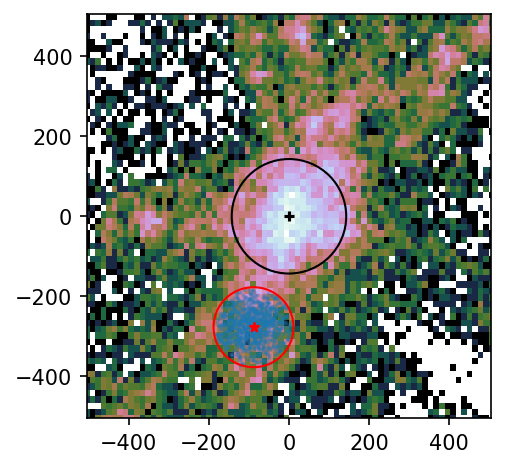

In [28]:
#picking out subhalos:
pos_sat_wrt_sat = scale_fact*(hal['position']-hal['position'][ms_cat_ind_300])
sub_hal_ind = np.where(np.linalg.norm(pos_sat_wrt_sat, axis=1) < rvir_merg_sat)[0]
sub_hal_ind_resolved = sub_hal_ind[hal['tree.index'][sub_hal_ind] > 0]

x_axis, y_axis = 0, 1

plt.figure(figsize=(3.5,3.5), dpi=150)

plt.hist2d(np.delete(hal['host.distance'], sub_hal_ind_resolved, axis=0)[:,x_axis],
           np.delete(hal['host.distance'], sub_hal_ind_resolved, axis=0)[:,y_axis],
#           C=feh,
           bins=300,
           norm = LogNorm(),
           cmap='cubehelix',
          )


plt.scatter(hal['host.distance'][sub_hal_ind_resolved,x_axis],
           hal['host.distance'][sub_hal_ind_resolved,y_axis],
           s=1, alpha=0.3, 
#           C=feh,
#            bins=300,
#            norm = LogNorm(),
#            cmap='cubehelix',
          )
plt.xlim(-505,505)
plt.ylim(-505,505)
plt.gca().xaxis.set_ticks([-400,-200,0,200,400])
plt.gca().set_aspect('equal')
plt.scatter(0, 0, marker='+', c='k', s=20)

rad_halo = plt.Circle((0,0),rvir_main_halo, color='k', fill=False)
plt.gca().add_patch(rad_halo)

plt.scatter(pos_sat_wrt_host[x_axis], pos_sat_wrt_host[y_axis], marker='*', c='r', s=20)
rad_mergsat = plt.Circle((pos_sat_wrt_host[x_axis], pos_sat_wrt_host[y_axis]),
                          rvir_merg_sat, color='r', fill=False)
plt.gca().add_patch(rad_mergsat)

In [29]:
##make dict of tree inds at 300.
store_dict = {'merg_sat':tree_ind_merg_sat[0],
              'main_halo': main_hal_tree_nsnap[0],
              'sub_halos': hal['tree.index'][sub_hal_ind_resolved], 
             }
import pickle
with open(f'{folder}subhalo_tree_ind.p', 'wb') as fp:
    pickle.dump(store_dict, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [30]:
## Tracking subhalos
def return_tracked_pos(tr_ind_at300):
    h_index = tr_ind_at300
    tree_ind = []
    for _ in range(300,601):
        tree_ind.append(h_index)
        h_index = halt['descendant.index'][h_index]
    tree_ind = np.array(tree_ind)
    position = halt['host.distance'][tree_ind]
    nsnaps = halt['snapshot'][tree_ind]
    mass = halt['mass'][tree_ind]
    velocity = halt['host.velocity'][tree_ind]
    vel_rad = halt['host.velocity.rad'][tree_ind]
    vel_tan = halt['host.velocity.tan'][tree_ind]
    cat_ind = halt['catalog.index'][tree_ind]
    
    return {'position': position,
            'snaps' : nsnaps,
            'mass' : mass,
            'velocity' : velocity,
            'vel.rad' : vel_rad,
            'vel.tan' : vel_tan,
            'catalog.index' : cat_ind
           }

In [31]:
%%time
dict_subhalo_track = dict()
for subhalo_tree in store_dict['sub_halos']:
    dict_subhalo_track[subhalo_tree] = return_tracked_pos(subhalo_tree)

with open(f'{folder}subhalo_track.p', 'wb') as fp:
    pickle.dump(dict_subhalo_track, fp, protocol=pickle.HIGHEST_PROTOCOL)

CPU times: user 161 ms, sys: 12.7 ms, total: 174 ms
Wall time: 208 ms


DONE TRACKING SUBHALOS!!! move on to plotting trials in relevant folders for the tracking.

In [55]:
subhalo_ind = store_dict
pos_LMC_subhal = np.array([dict_subhalo_track[key]['position'][nsnap-300] for key in subhalo_ind['sub_halos']])

## Check principal axis frames

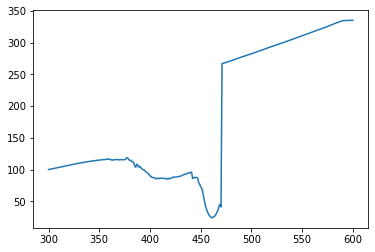

In [22]:
plt.plot(np.arange(300,601), virial_rad)

## random checkl

Reading data for sim: m12b_res7100, snapshot = 385 


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/snapshot_times.txt

  using snapshot index = 385, redshift = 0.488


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/output/snapdir_385/snapshot_385.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 74537000 particles
    dark2     (id = 2): 6750970 particles
    gas       (id = 0): 64162001 particles
    star      (id = 4): 10869964 particles
    blackhole (id = 5): 0 particles

* reading species: ['star']
* reading particles from:
    snapshot_385.0.hdf5
    snapshot_385.1.hdf5
    snapshot_385.2.hdf5
    snapshot_385.3.hdf5
    snapshot_385.4.hdf5
    snapshot_385.5.hdf5
    snapshot_385.6.hdf5
    snapshot_385.7.hdf5

* reading cosmological parameters from:  mnt/ceph/users/firesims/fire2/metaldiff/m12b_res7100/initial_condition

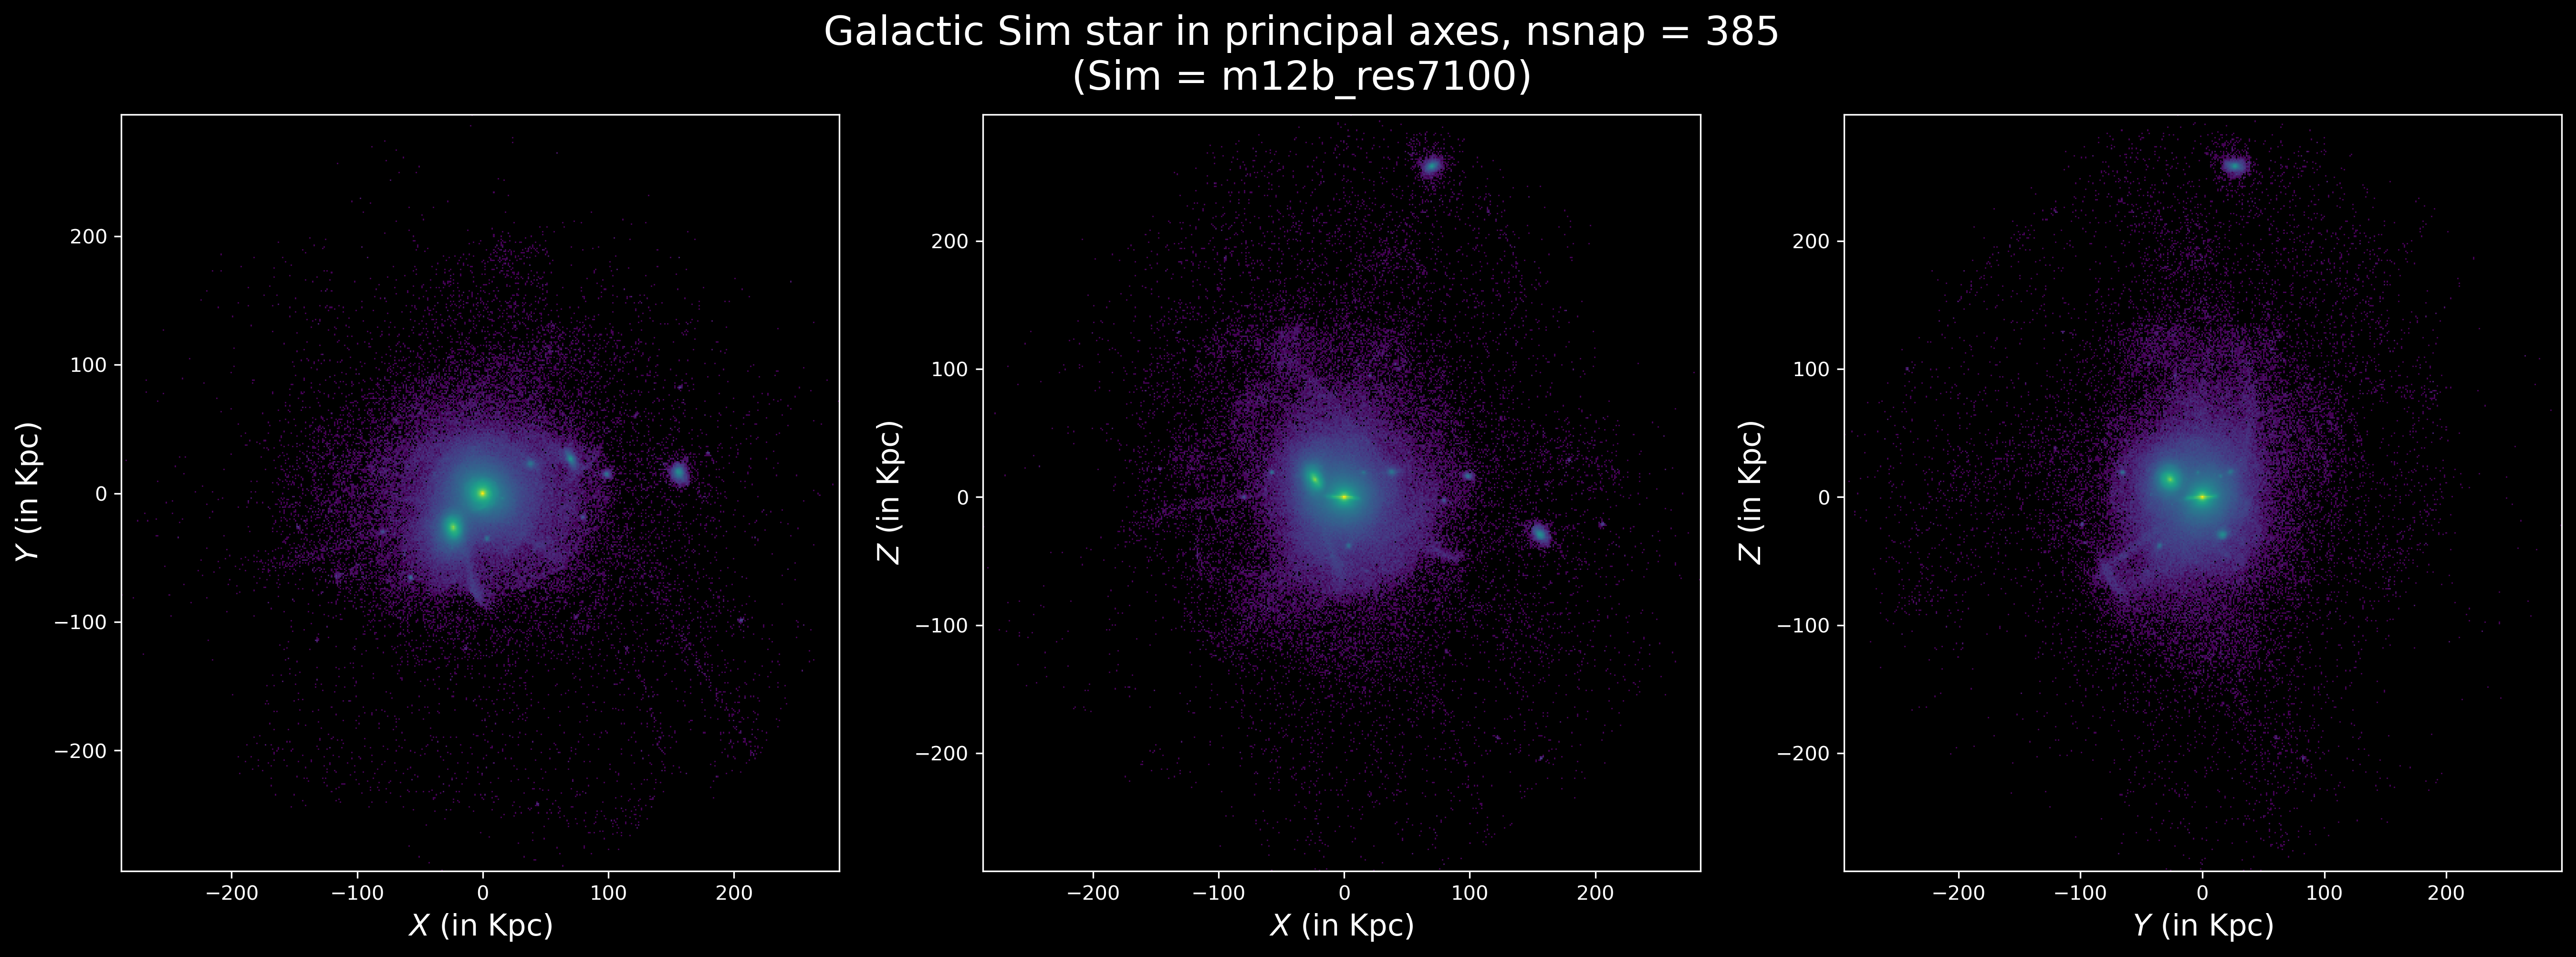

In [36]:
cc.visualize('b',385,R_max=300)